In [7]:
import numpy as np
from sklearn.metrics import pairwise_distances

total_numberOf_cluster = 3

test_data = open('1604554690_4994035_1601384279_9602122_iris_new_data.txt','r', encoding="utf8")

InputData = []
for line in test_data:
    line = line.strip()
    line = [float(x) for x in line.split()]
    
    InputData.append(line)
    
    
    test_data = np.array(InputData)
    total_numberOf_data = test_data.shape[0]
    
    
    

In [8]:
#This creates three random centroids because we have 3 cluster
centroids = test_data[np.random.choice(total_numberOf_data, total_numberOf_cluster, replace = False)]

print(centroids)

[[5.  3.2 1.2 0.2]
 [7.  3.2 4.7 1.4]
 [4.8 3.  1.4 0.3]]


In [9]:


    distance = pairwise_distances(X = test_data, Y = centroids, metric = 'cosine')
  
    final_cluster = distance.argmin(axis = 1)
   
 

    new_centroid_list = []

    #loop through each cluster (This loops three times until it finds the best cluster)
    for cluster in range(total_numberOf_cluster):

        mean_array = np.array([test_data[final_cluster == cluster].mean(axis = 0)])
        new_centroid_list.append(mean_array)

    centroids = new_centroid_list

     

centroids_array = [] 
centroids_array.append(new_centroid_list[0][0])
centroids_array.append(new_centroid_list[1][0])
centroids_array.append(new_centroid_list[2][0])
print(centroids_array)
    


[[3.95667959e-03 8.38346165e-02 5.31084039e-03]
 [3.30389087e-03 8.78334482e-02 5.33828183e-03]
 [5.05530447e-03 8.49061110e-02 6.48387756e-03]
 [1.05749383e-03 9.09049590e-02 3.96279301e-03]
 [3.07790942e-03 6.39012991e-02 2.14681259e-03]
 [1.87071219e-03 8.21275666e-02 3.38409973e-03]
 [1.21651533e-01 7.64307354e-03 9.98058005e-02]
 [1.06751264e-01 3.82372565e-03 8.62806353e-02]
 [6.84649665e-03 5.50091094e-02 4.27598882e-03]
 [1.16770616e-03 6.21146489e-02 4.46488391e-04]
 [3.50171170e-03 7.04768872e-02 3.36566363e-03]
 [3.00161134e-03 7.31849105e-02 3.22248451e-03]
 [2.61316292e-03 6.87710582e-02 2.33283623e-03]
 [8.08270564e-04 7.08859852e-02 1.21927234e-03]
 [1.18036574e-03 7.12283320e-02 1.55087861e-03]
 [1.22284421e-01 9.13833591e-03 1.00414070e-01]
 [1.71669637e-03 7.47280456e-02 2.39746564e-03]
 [4.77393734e-03 1.00071311e-01 8.11263750e-03]
 [4.32951937e-03 5.67495637e-02 2.30619426e-03]
 [8.83272231e-04 6.65932752e-02 7.75559515e-04]
 [8.61615934e-04 6.97794381e-02 1.072860

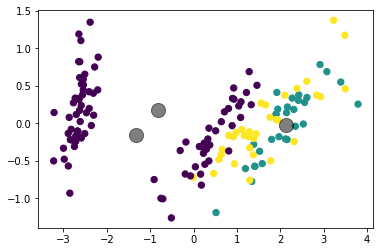

In [21]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#Load Data
#data = load_digits().data
pca = PCA(2)
 
    
#Transform the data
df = pca.fit_transform(test_data)

df_center = pca.fit_transform(centroids_array)

 
df.shape
df_center

plt.scatter(df[:, 0], df[:, 1], c=final_cluster,s=40, cmap='viridis')
plt.scatter(df_center[:, 0], df_center[:, 1], c='black', s=200, alpha=0.5)

In [22]:
final_cluster = final_cluster.tolist()
#writing in the output file
output_file = open("iris_format.txt", "w+")
for i in final_cluster:
    output_file.write(str(i+1)+"\n")